In [78]:
import numpy as np
from numpy import pi, sqrt, cos, sin, radians, arcsin
import matplotlib.pyplot as plt




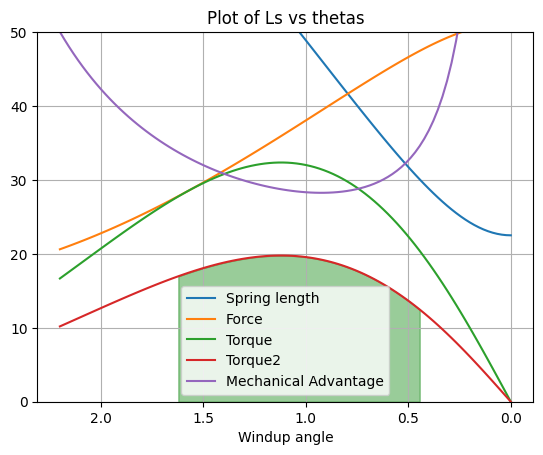

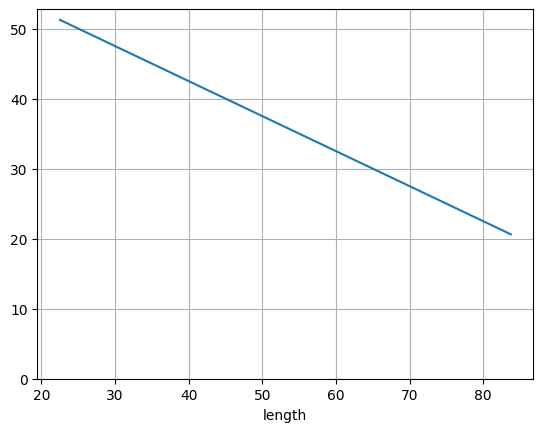

In [80]:
L1 = 57.896
L2 = 35.384
k = 0.5
L0 = 85
F0 = 20
theta_start = radians(94.1)
theta_end = radians(94.1 - 68.8)

thetas = np.linspace(2.2, 0, 100)

Ls = sqrt(L1**2 + L2**2 - 2*L1*L2*cos(thetas))
Fs = k*np.abs(L0 - Ls) + F0
phis = arcsin(L2*sin(thetas)/L1)
Ts = Fs*sin(phis)

mech_advs = np.diff(thetas)/np.diff(Ls)

plt.figure()
plt.ylim(ymin=0, ymax=50)
plt.plot(thetas, Ls, label='Spring length')
plt.plot(thetas, Fs, label='Force' )
plt.plot(thetas, Fs*sin(thetas), label='Torque')
plt.plot(thetas, Ts, label='Torque2')
plt.plot(thetas[:-1], 1000*mech_advs, label='Mechanical Advantage')
plt.xlabel('Windup angle')
plt.title('Plot of Ls vs thetas')
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()

# Highlight the area underneath the Ls curve between x=2 and 1

x_fill = thetas[(thetas <= theta_start) & (thetas >= theta_end)]
y_fill = Ts[(thetas <= theta_start) & (thetas >= theta_end)]
plt.fill_between(x_fill, y_fill, color='green', alpha=0.4)
# plt.grid(None)
plt.show()

plt.figure()
plt.plot(Ls, Fs)
plt.grid(True)
plt.xlabel('length')
plt.ylim(ymin=0)


plt.show()

In [69]:
Ls

array([83.75662188, 83.31248418, 82.85900257, 82.39624859, 81.92429557,
       81.4432187 , 80.95309503, 80.45400347, 79.94602488, 79.42924201,
       78.90373959, 78.36960437, 77.8269251 , 77.27579261, 76.71629982,
       76.14854182, 75.57261587, 74.98862149, 74.39666046, 73.79683696,
       73.18925752, 72.57403119, 71.95126954, 71.32108676, 70.68359975,
       70.03892818, 69.38719461, 68.72852458, 68.06304673, 67.39089288,
       66.71219822, 66.02710138, 65.33574464, 64.63827403, 63.93483954,
       63.22559532, 62.51069982, 61.79031608, 61.06461192, 60.3337602 ,
       59.59793913, 58.85733252, 58.11213014, 57.36252807, 56.60872906,
       55.85094298, 55.08938723, 54.32428728, 53.55587716, 52.78440006,
       52.01010896, 51.23326731, 50.45414978, 49.6730431 , 48.89024688,
       48.10607466, 47.32085488, 46.53493209, 45.74866816, 44.96244363,
       44.17665922, 43.39173739, 42.60812413, 41.82629078, 41.04673615,
       40.26998868, 39.49660882, 38.72719165, 37.96236956, 37.20